In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)


In [6]:
# INPUT, PROCESS, OUTPUT
# Dictionary or JSON javascript object notation n*m

olddata = {
    "name": ["Tijani", "Zainab"],
    "age": [30,50],
    "location": ["Manchester", "Stoke"],
    "income": [120000, 150000]
}

newdata = pd.DataFrame(olddata)
newdata.head()

,name,age,location,income
0,Tijani,30,Manchester,120000
1,Zainab,50,Stoke,150000


In [17]:
def load_data():
    data = load_breast_cancer()

    X = pd.DataFrame(
        data.data,
        columns = data.feature_names
    )
    
    y = pd.Series(
        data.target,
        name = "target"
    )

    return X, y
load_data()


(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  mean conca

Dataset shape: (569, 30)

First 5 rows:

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst

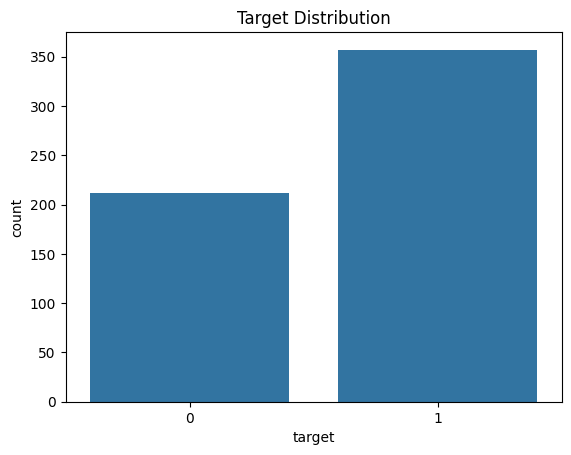

In [25]:
X, y = load_data()

def explore_data(X, y):
    
    print("Dataset shape:", X.shape)
    print("\nFirst 5 rows:\n")
    print(X.head())
    
    print("\nTarget distribution:\n")
    print(y.value_counts())
    
    sns.countplot(x=y)
    plt.title("Target Distribution")
    plt.show()

explore_data(X,y)



In [28]:
def split_data(X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test


In [29]:
def build_model():
    
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", LogisticRegression(max_iter=1000))
    ])
    
    return pipeline


In [30]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model